In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中
%matplotlib inline


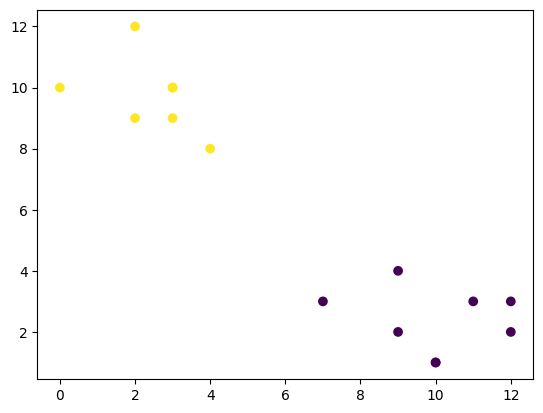

In [2]:
data = pd.read_excel('../data/电影类型.xlsx')
x = data[['打斗镜头', '亲吻镜头']]
y = data['类型'].map({'动作': 0, '爱情': 1})
plt.scatter(x['打斗镜头'], x['亲吻镜头'], c=y)


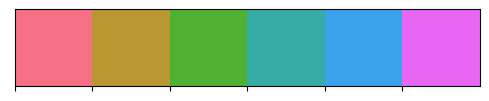

In [3]:
colors = sns.color_palette('husl')
sns.palplot(colors)


Text(0, 0.5, 'love')

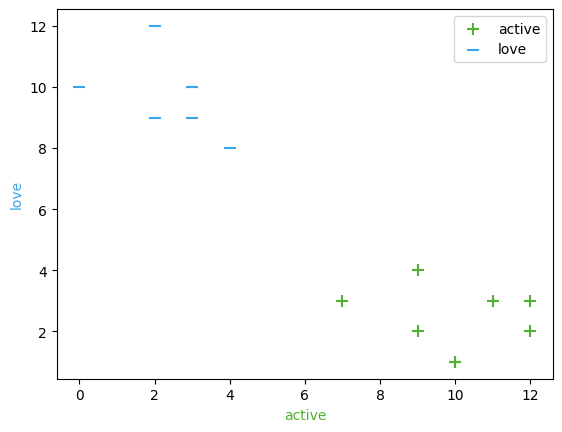

In [4]:
active = x.loc[y == 0]
love = x.loc[y == 1]
plt.scatter(active['打斗镜头'], active['亲吻镜头'], marker='+',
            s=80, color=colors[2], label='active')
plt.scatter(love['打斗镜头'], love['亲吻镜头'], marker='_',
            s=80, color=colors[4], label='love')
plt.legend()
plt.xlabel('active', color=colors[2])
plt.ylabel('love', color=colors[4])


In [5]:
from sklearn.neighbors import KNeighborsClassifier


In [6]:
# n_neighbors是K值的个数,分类问题一般取奇数
knn = KNeighborsClassifier(n_neighbors=3)


In [7]:
# 使用数据样本训练knn
knn.fit(x, y)


KNeighborsClassifier(n_neighbors=3)

In [8]:
# 训练之后就变成了模型对象,模型对象可以用来预测未知数据
film = np.array([[7, 3], [10, 3], [1, 9]])
knn.predict(film)


/Users/dellu/miniconda3/envs/d2l/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1])

/Users/dellu/miniconda3/envs/d2l/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


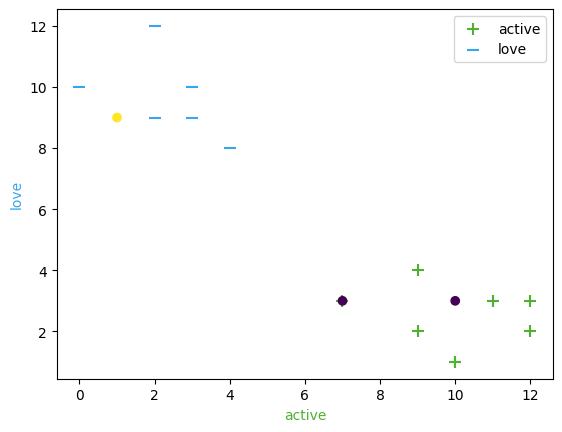

In [9]:
active = x.loc[y == 0]
love = x.loc[y == 1]
plt.scatter(active['打斗镜头'], active['亲吻镜头'], marker='+',
            s=80, color=colors[2], label='active')
plt.scatter(love['打斗镜头'], love['亲吻镜头'], marker='_',
            s=80, color=colors[4], label='love')
plt.legend()
plt.xlabel('active', color=colors[2])
plt.ylabel('love', color=colors[4])
# 绘制预测的散点
plt.scatter(film[:, 0], film[:, 1], c=knn.predict(film))


In [10]:
# K值的选择经验值: 不能超过样本集数据个数的平方根,并且K选择奇数
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
film = np.array([[7, 3], [10, 3], [1, 9]])
knn.predict(film)

/Users/dellu/miniconda3/envs/d2l/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1])

# 如何找到合适的K值?
* 对模型优化,需要掌握对模型评价的策略
* 要知道那个K值对应的模型的预测效果更好(需要使用评价指标来完成)
* 分类模型最常用的就是准确率(预测正确的样本个数 / 预测的总样本数)